In [37]:
import pandas as pd # Pandas for creating dataframe and data manipulation.

In [38]:
data = pd.read_csv('data/data.csv') # creating dataframe of the csv file.

In [39]:
data.head() # Displaying First 5 data points of the dataset.

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


Handling datatypes and Missing Values.

In [40]:
data.shape # dimensions of the dataset.

(16857, 29)

In [41]:
# checking the data types.
data.dtypes

timestamp                        object
equipment_energy_consumption     object
lighting_energy                  object
zone1_temperature                object
zone1_humidity                   object
zone2_temperature                object
zone2_humidity                  float64
zone3_temperature               float64
zone3_humidity                  float64
zone4_temperature               float64
zone4_humidity                  float64
zone5_temperature               float64
zone5_humidity                  float64
zone6_temperature               float64
zone6_humidity                  float64
zone7_temperature               float64
zone7_humidity                  float64
zone8_temperature               float64
zone8_humidity                  float64
zone9_temperature               float64
zone9_humidity                  float64
outdoor_temperature             float64
atmospheric_pressure            float64
outdoor_humidity                float64
wind_speed                      float64


In [42]:
# timestamp should be in datetime format.
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [43]:
# The columns 'equipment_energy_consumption', 'lighting energy', 'zone1_temperature', 'zone1_humidity', 'zone2_temperature' are should be of float datatypes instead of object data types.

In [44]:
error_columns = data['equipment_energy_consumption'].astype(str)
# checking for entries that are not numeric
mask = ~error_columns.str.replace('.', '', 1).str.isnumeric()
error_rows = data[mask]
print(error_rows)


                timestamp equipment_energy_consumption lighting_energy  \
8     2016-01-11 18:20:00                          NaN            40.0   
30    2016-01-11 22:00:00                          NaN            20.0   
41    2016-01-11 23:50:00                          NaN            20.0   
60    2016-01-12 03:00:00                          NaN             0.0   
62    2016-01-12 03:20:00                          NaN             0.0   
...                   ...                          ...             ...   
16783 2016-05-06 18:20:00                       -200.0             0.0   
16793 2016-05-06 19:50:00                          NaN            20.0   
16794 2016-05-06 20:00:00           -944.5664110012307             NaN   
16799 2016-05-06 20:50:00                          NaN             0.0   
16846 2016-07-02 16:30:00                          NaN            10.0   

        zone1_temperature      zone1_humidity   zone2_temperature  \
8                   19.79             45.5

In [45]:
data['equipment_energy_consumption'] = pd.to_numeric(data['equipment_energy_consumption'], errors='coerce')

In [47]:
data['lighting_energy'] = pd.to_numeric(data['lighting_energy'], errors='coerce')
data['zone1_temperature'] = pd.to_numeric(data['zone1_temperature'], errors='coerce')
data['zone1_humidity'] = pd.to_numeric(data['zone1_humidity'], errors='coerce')
data['zone2_temperature'] = pd.to_numeric(data['zone2_temperature'], errors='coerce')

In [48]:
data.dtypes

timestamp                       datetime64[ns]
equipment_energy_consumption           float64
lighting_energy                        float64
zone1_temperature                      float64
zone1_humidity                         float64
zone2_temperature                      float64
zone2_humidity                         float64
zone3_temperature                      float64
zone3_humidity                         float64
zone4_temperature                      float64
zone4_humidity                         float64
zone5_temperature                      float64
zone5_humidity                         float64
zone6_temperature                      float64
zone6_humidity                         float64
zone7_temperature                      float64
zone7_humidity                         float64
zone8_temperature                      float64
zone8_humidity                         float64
zone9_temperature                      float64
zone9_humidity                         float64
outdoor_tempe

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  15945 non-null  float64       
 2   lighting_energy               15993 non-null  float64       
 3   zone1_temperature             15908 non-null  float64       
 4   zone1_humidity                15969 non-null  float64       
 5   zone2_temperature             15934 non-null  float64       
 6   zone2_humidity                15990 non-null  float64       
 7   zone3_temperature             16055 non-null  float64       
 8   zone3_humidity                15979 non-null  float64       
 9   zone4_temperature             16041 non-null  float64       
 10  zone4_humidity                16076 non-null  float64       
 11  zone5_temperature           

In [50]:
missing_counts = data.isnull().sum()
print(missing_counts[missing_counts > 0].sort_values(ascending=False))

zone1_temperature               949
zone2_temperature               923
equipment_energy_consumption    912
zone1_humidity                  888
zone9_humidity                  888
zone3_humidity                  878
zone2_humidity                  867
lighting_energy                 864
zone8_temperature               848
zone6_temperature               848
zone6_humidity                  847
atmospheric_pressure            842
zone5_temperature               838
wind_speed                      828
random_variable1                826
dew_point                       826
random_variable2                824
zone4_temperature               816
visibility_index                815
outdoor_temperature             806
zone7_humidity                  805
zone3_temperature               802
zone5_humidity                  801
outdoor_humidity                799
zone7_temperature               794
zone4_humidity                  781
zone8_humidity                  777
zone9_temperature           

In [51]:
# since the null values are in large numbers we can't drop all of them. We can fill the mean value or median value, but first we have to see the distribution of the data. If it appears to be symmetric we can go with mean and if it comes out to be skewed we can go with median. 

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns


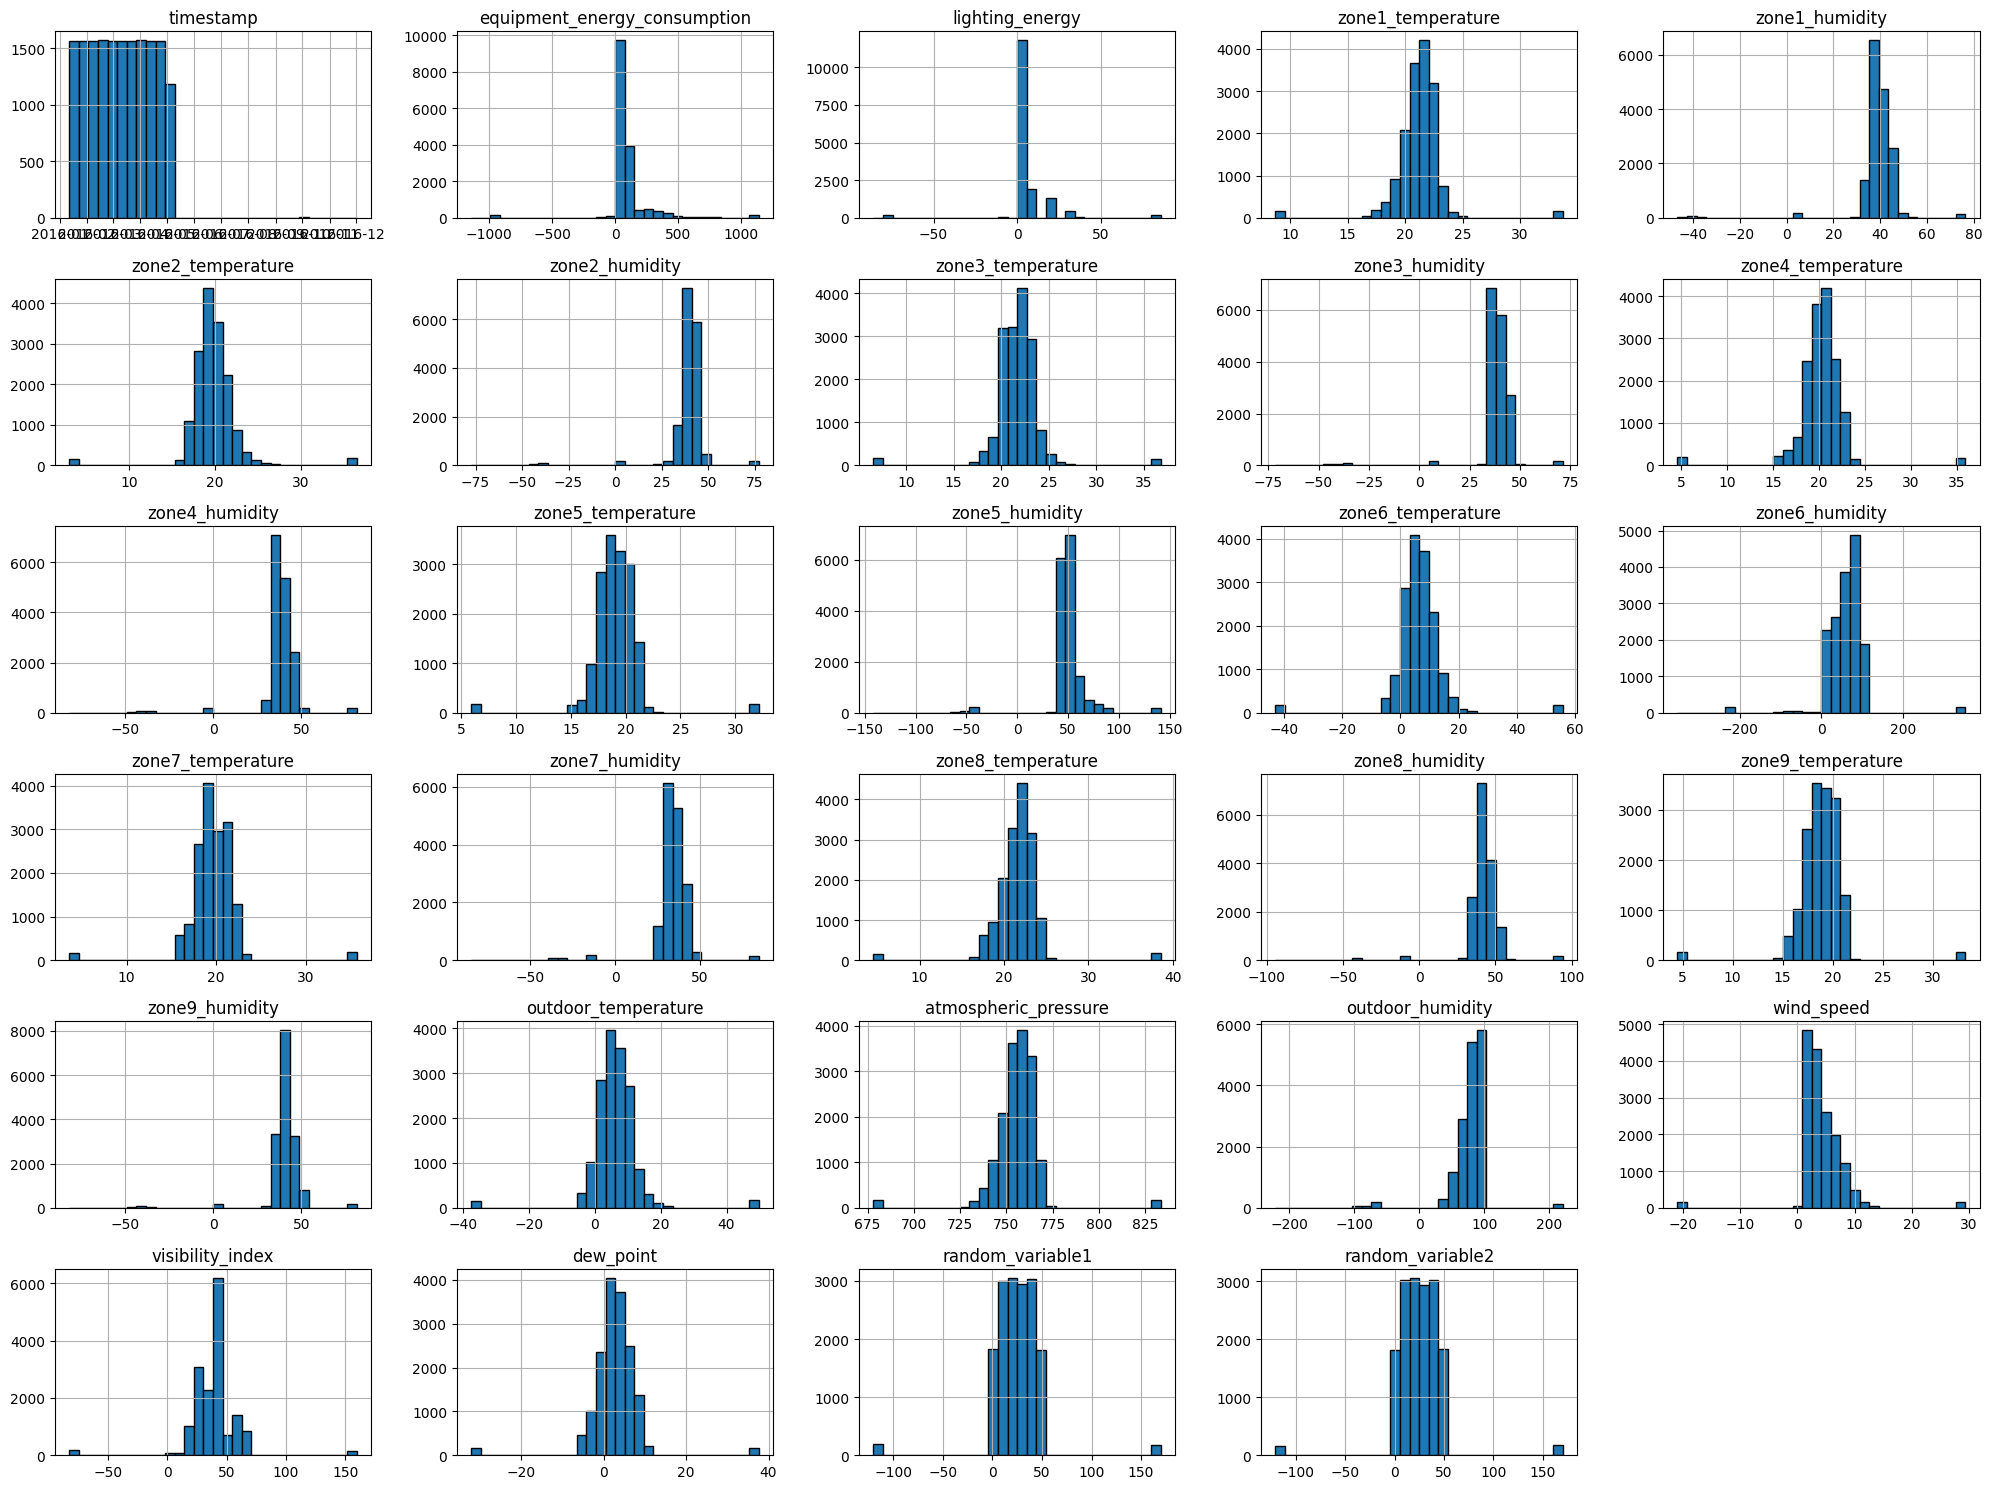

In [53]:
data.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.tight_layout()
plt.show()

In [54]:
# from the distribution we can see that the columns like 'equipment_energy_cosumption', 'wind_speed', 'visibility_index', zone1 to zone9 humidity columns, outdoor_humidity, have skewed distributions that means these columns contain outliers so we can fill the missing values as median values. Others columns are normally distributed so we can go with mean.

In [55]:
mean_cols = [
    'lighting_energy',
    'zone1_temperature', 'zone2_temperature', 'zone3_temperature', 'zone4_temperature',
    'zone5_temperature', 'zone6_temperature', 'zone7_temperature', 'zone8_temperature', 'zone9_temperature',
    'outdoor_temperature', 'atmospheric_pressure', 'dew_point',
    'random_variable1', 'random_variable2'
]
for col in mean_cols:
    data[col].fillna(data[col].mean(), inplace=True)

In [56]:
median_cols = [
    'equipment_energy_consumption', 'wind_speed', 'visibility_index',
    'zone1_humidity', 'zone2_humidity', 'zone3_humidity', 'zone4_humidity',
    'zone5_humidity', 'zone6_humidity', 'zone7_humidity', 'zone8_humidity', 'zone9_humidity',
    'outdoor_humidity'
]
for col in median_cols:
    data[col].fillna(data[col].median(), inplace=True)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  16857 non-null  float64       
 2   lighting_energy               16857 non-null  float64       
 3   zone1_temperature             16857 non-null  float64       
 4   zone1_humidity                16857 non-null  float64       
 5   zone2_temperature             16857 non-null  float64       
 6   zone2_humidity                16857 non-null  float64       
 7   zone3_temperature             16857 non-null  float64       
 8   zone3_humidity                16857 non-null  float64       
 9   zone4_temperature             16857 non-null  float64       
 10  zone4_humidity                16857 non-null  float64       
 11  zone5_temperature           